In [1]:
## --- Testing Graph Generation ----

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
# sys.path.insert(1, '/path/to/application/app/folder')
sys.path.insert(1, '../')

## Import Libs and Functions
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import collections as mc
from mpl_toolkits.mplot3d import art3d as mc3D #Line3DCollection
# from matplotlib
from graph_generation import multi_layer_downsampling_random, gen_disjointed_rnn_local_graph_v3, gen_multi_level_local_graph_v3

In [2]:
## Sample Point Cloud
scaling = np.array([1, 1, 0.5])
pc = np.random.random((100,3)) * scaling 

## Sample Graph constructing dict
settings = {
    'add_rnd3d': False,
    'base_voxel_size': 0.8/10,
    'downsample_method': 'random',
    'level_configs': [
        {'graph_gen_kwargs': {'num_neighbors': 64, 'radius': 1/10},
         'graph_gen_method': 'disjointed_rnn_local_graph_v3',
         'graph_level': 0,
         'graph_scale': 2},
        {'graph_gen_kwargs': {'num_neighbors': 192, 'radius': 5/10},
         'graph_gen_method': 'disjointed_rnn_local_graph_v3',
         'graph_level': 1,
         'graph_scale': 4}]
}

## Constructing the Graph, including intermedite functions
vertex_coords_list, keypoint_indicies_list, edge_list = \
    gen_multi_level_local_graph_v3(pc, settings['base_voxel_size'], settings['level_configs'])

Layer sizes:
--0: 100
--1: 67
--2: 25


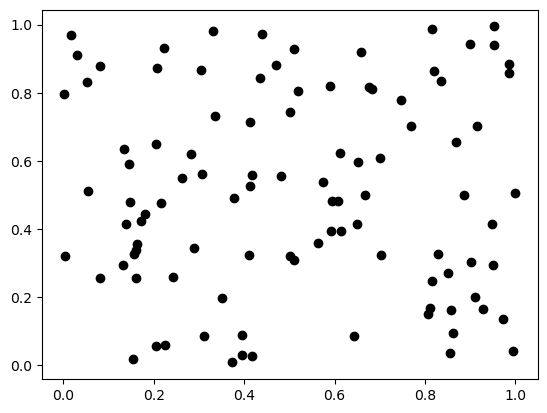

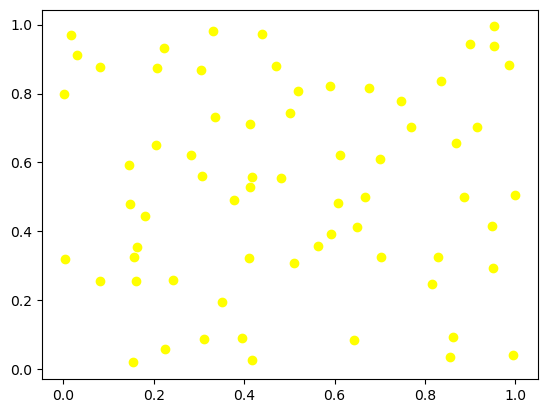

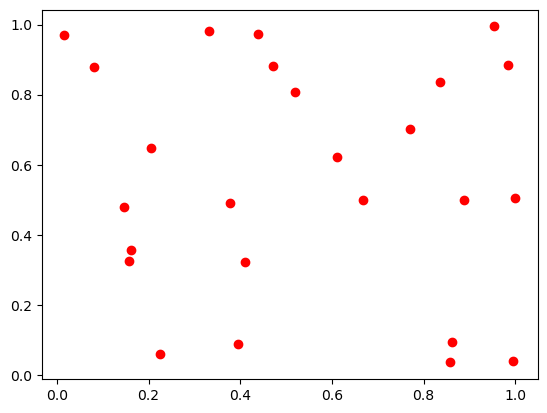

In [3]:
## Visualizing the Graph by drawing each layer in a different color, standalone

colors = ['black', 'yellow', 'red']
alphas = [1, 1, 1]
print("Layer sizes:")
for layer, layer_points in enumerate(vertex_coords_list):
    
    ## Separately
    fix, ax = plt.subplots()
    
    print(f"--{layer}:", layer_points.shape[0])
    ax.scatter(layer_points[:,0], layer_points[:,1], c=colors[layer])


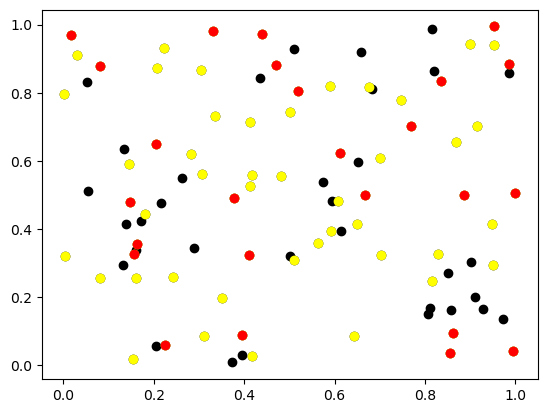

In [4]:
## Visualizing the Graph by drawing each layer in a different color, altogether

colors = ['black', 'yellow', 'red']
# alphas = [1, 0.25, 0.8]
alphas = [1, 1, 1]
for layer, layer_points in enumerate(vertex_coords_list):
        
    ## Altogether
    plt.scatter(layer_points[:,0], layer_points[:,1], c=colors[layer], alpha=alphas[layer])

Summary Info:
--edges.shape (92, 2)
--src (100, 2)
--dest (67, 2)

Summary Info:
--edges.shape (611, 2)
--src (67, 2)
--dest (25, 2)



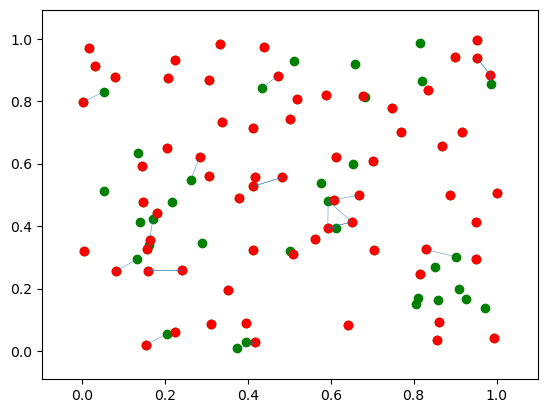

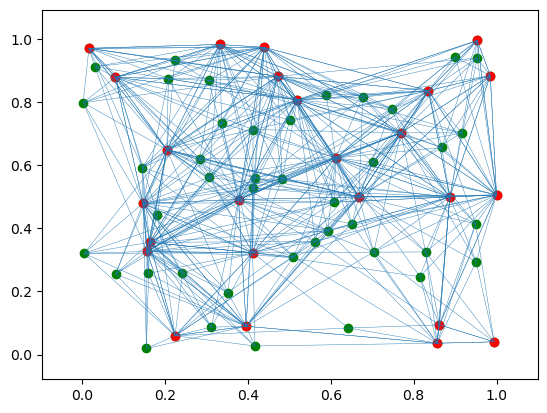

In [5]:
## Visualizing the Edges by drawing per-layer lines with scatter overlay
## Standalone, 2D

colors = ['red', 'yellow', 'green']
for edge_group, edges in enumerate(edge_list):

    print("Summary Info:")
    print("--edges.shape", edges.shape)
    
    src = vertex_coords_list[edge_group][:, :-1] ## for x, y info only
    print("--src", src.shape)
    
    dest = vertex_coords_list[edge_group+1][:, :-1] ## for x, y info only
    print("--dest", dest.shape)
    print()
    
    ## Lines to LineCollection
    lines = []
    for edge in edges:
        line = np.vstack([src[edge[0]], dest[edge[1]]])
        lines.append(line)
    lc = mc.LineCollection(lines, linewidths=0.3)    

    ## Plotting
    fig, ax = plt.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    ax.scatter(src[:, 0], src[:, 1], color="green")
    ax.scatter(dest[:, 0], dest[:, 1], color="red")


In [6]:
# ## 3D Plot of the Edges, with scatter overlay
# ## For each laayer level

# colors = ['red', 'yellow', 'green']
# for edge_group, edges in enumerate(edge_list):
#     print("edge_group", edge_group)
#     print("edges", edges.shape)
#     srcs = vertex_coords_list[edge_group]
#     print("srcs", srcs.shape)
#     dests = vertex_coords_list[edge_group+1]
#     print("dests", dests.shape)

#     lines3D = []
#     for edge in edges:
#         src = srcs[edge[0]]
#         dest = dests[edge[1]]
#         line = [src[0], dest[0]], [src[1], dest[1]], [src[2], dest[2]]
        
#         lines3D.append(line)
        
# #     print(lines3D)
# #     print()
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     for line in lines3D:
#         ax.plot(*line, color="blue")
# # #     lc = mc.LineCollection(lines, linewidths=0.3)
# #     lc3D = mc3D.Line3DCollection(lines3D)

        
# # #     print(edges.shape)
# # #     print()

    
    
# # #     edges_coords = []
# # #     for edge in edges:
# # #         edges_coords.append(src[edge]) 
# # #         print(src[edge])#, dest[edge])
# # #         print()
# # #     np.hstack([src[edges[:, 0]], dest[edges[:, 1]]])
# # #     lc = mc.LineCollection([edges_coords])
# #     fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
# #     ax.add_collection(lc3D)
# #     ax.autoscale()
# #     ax.margins(0.1)
# # #     ax.scatter(src[:, 0], src[:, 1],src[:,2], color="green")
# # #     ax.scatter(dest[:, 0], dest[:, 1], dest[:,2], color="red")


## Conclusions

Multi Level filtering based on the base voxel size and the per layer scaling
 --> Filtering is done on the upstream layer
 
Intergraph edges based on the specified layer radius
 --> Determines which from the upstream feed into the downstream
 
